In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import EllipseCollection

In [2]:
points = np.array([
[0.94,	1185],
[0.93,	1109],
[0.92,	1038],
[0.91,	973],
[0.90,	912],
[0.88,	802],
[0.86,	707],
[0.84,	625],
[0.82,	553],
[0.80,	490],
[0.78,	435],
[0.76,	387],
[0.74,	345],
[0.72,	308],
[0.70,	275],
[0.68,	247],
[0.66,	222],
[0.64,	199],
[0.62,	180],
[0.60,	162],
[0.58,	147],
[0.56,	133],
[0.54,	121],
[0.52,	110],
[0.50,	100],
[0.45,	80],
[0.40,	65],
[0.35,	53],
[0.30,	44],
[0.25,	37],
[0.20,	31]
])
import sklearn.pipeline as skl_pipe
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lin
pipe = skl_pipe.Pipeline((
    ('fet', skl_pre.PolynomialFeatures(degree=10)),
    ('pred', skl_lin.Ridge(alpha=0.04081632653061224)),
))
pipe.fit(points[:,[0]], points[:,1])

def get_final_score(A,D):
    return pipe.predict([[D * A]])[0]

In [3]:
class Wald:
    def __init__(self, file) -> None:
        with open(file, "r") as f:
            self.name = f.readline()
            tmp = f.readline().split(" ")
            self.x_size = int(tmp[0])
            self.y_size = int(tmp[1])
            tmp = pd.read_csv(f, sep=" ", names=["num", "names"])
            self.sizes = tmp["num"].values.astype(np.float64)
            sort = np.argsort(-self.sizes)
            self.sizes = self.sizes[sort]
            self.indices = np.arange(self.sizes.shape[0])[sort]
            self.names = tmp["names"].values.astype(str)

    def score(self, w: pd.DataFrame):
        D = 0
        A = 0
        for i, r in enumerate(self.sizes):
            ni = (w["label"] == self.indices[i]).sum()
            D += (ni / w.shape[0]) ** 2
            A += ni * np.pi * r ** 2
        D = 1 - D
        A = A / (self.x_size * self.y_size)
        return D, A

    def plot(self, w: pd.DataFrame, size=10,dpi=200, legend=True):
        plt.figure(figsize=(size, self.y_size / self.x_size * size), dpi=dpi)
        ax = plt.gca()
        ax.add_collection(
            EllipseCollection(
                w["size"] * 2,
                w["size"] * 2,
                0,
                units="xy",
                edgecolors=plt.cm.gist_rainbow(w["label"] / len(self.names)),
                offsets=w[["x", "y"]],
                transOffset=ax.transData,
                linewidth=0.2,
                facecolors="none",
            )
        )
        plt.xlim((0, self.x_size))
        plt.ylim((0, self.y_size))
        if legend:
            plt.legend(
                handles=[
                    mpatches.Patch(
                        color=plt.cm.gist_rainbow(i / len(self.names)),
                        label=f"{n[0]}: {n[1]}",
                    )
                    for i, n in enumerate(zip(self.names, self.sizes))
                ],
                bbox_to_anchor=(1, 1),
            )
        D, A = self.score(w)
        plt.title(
            f"{self.name} $D = {np.round(D,3)},A = {np.round(A,5)},B = {np.round(D*A,5)}, score = {np.round(get_final_score(A, D), 2)}$"
        )
        plt.show()

def read_result(file: str) -> pd.DataFrame:
    return pd.read_csv(file, sep=" ",names=["x","y","size","label"])

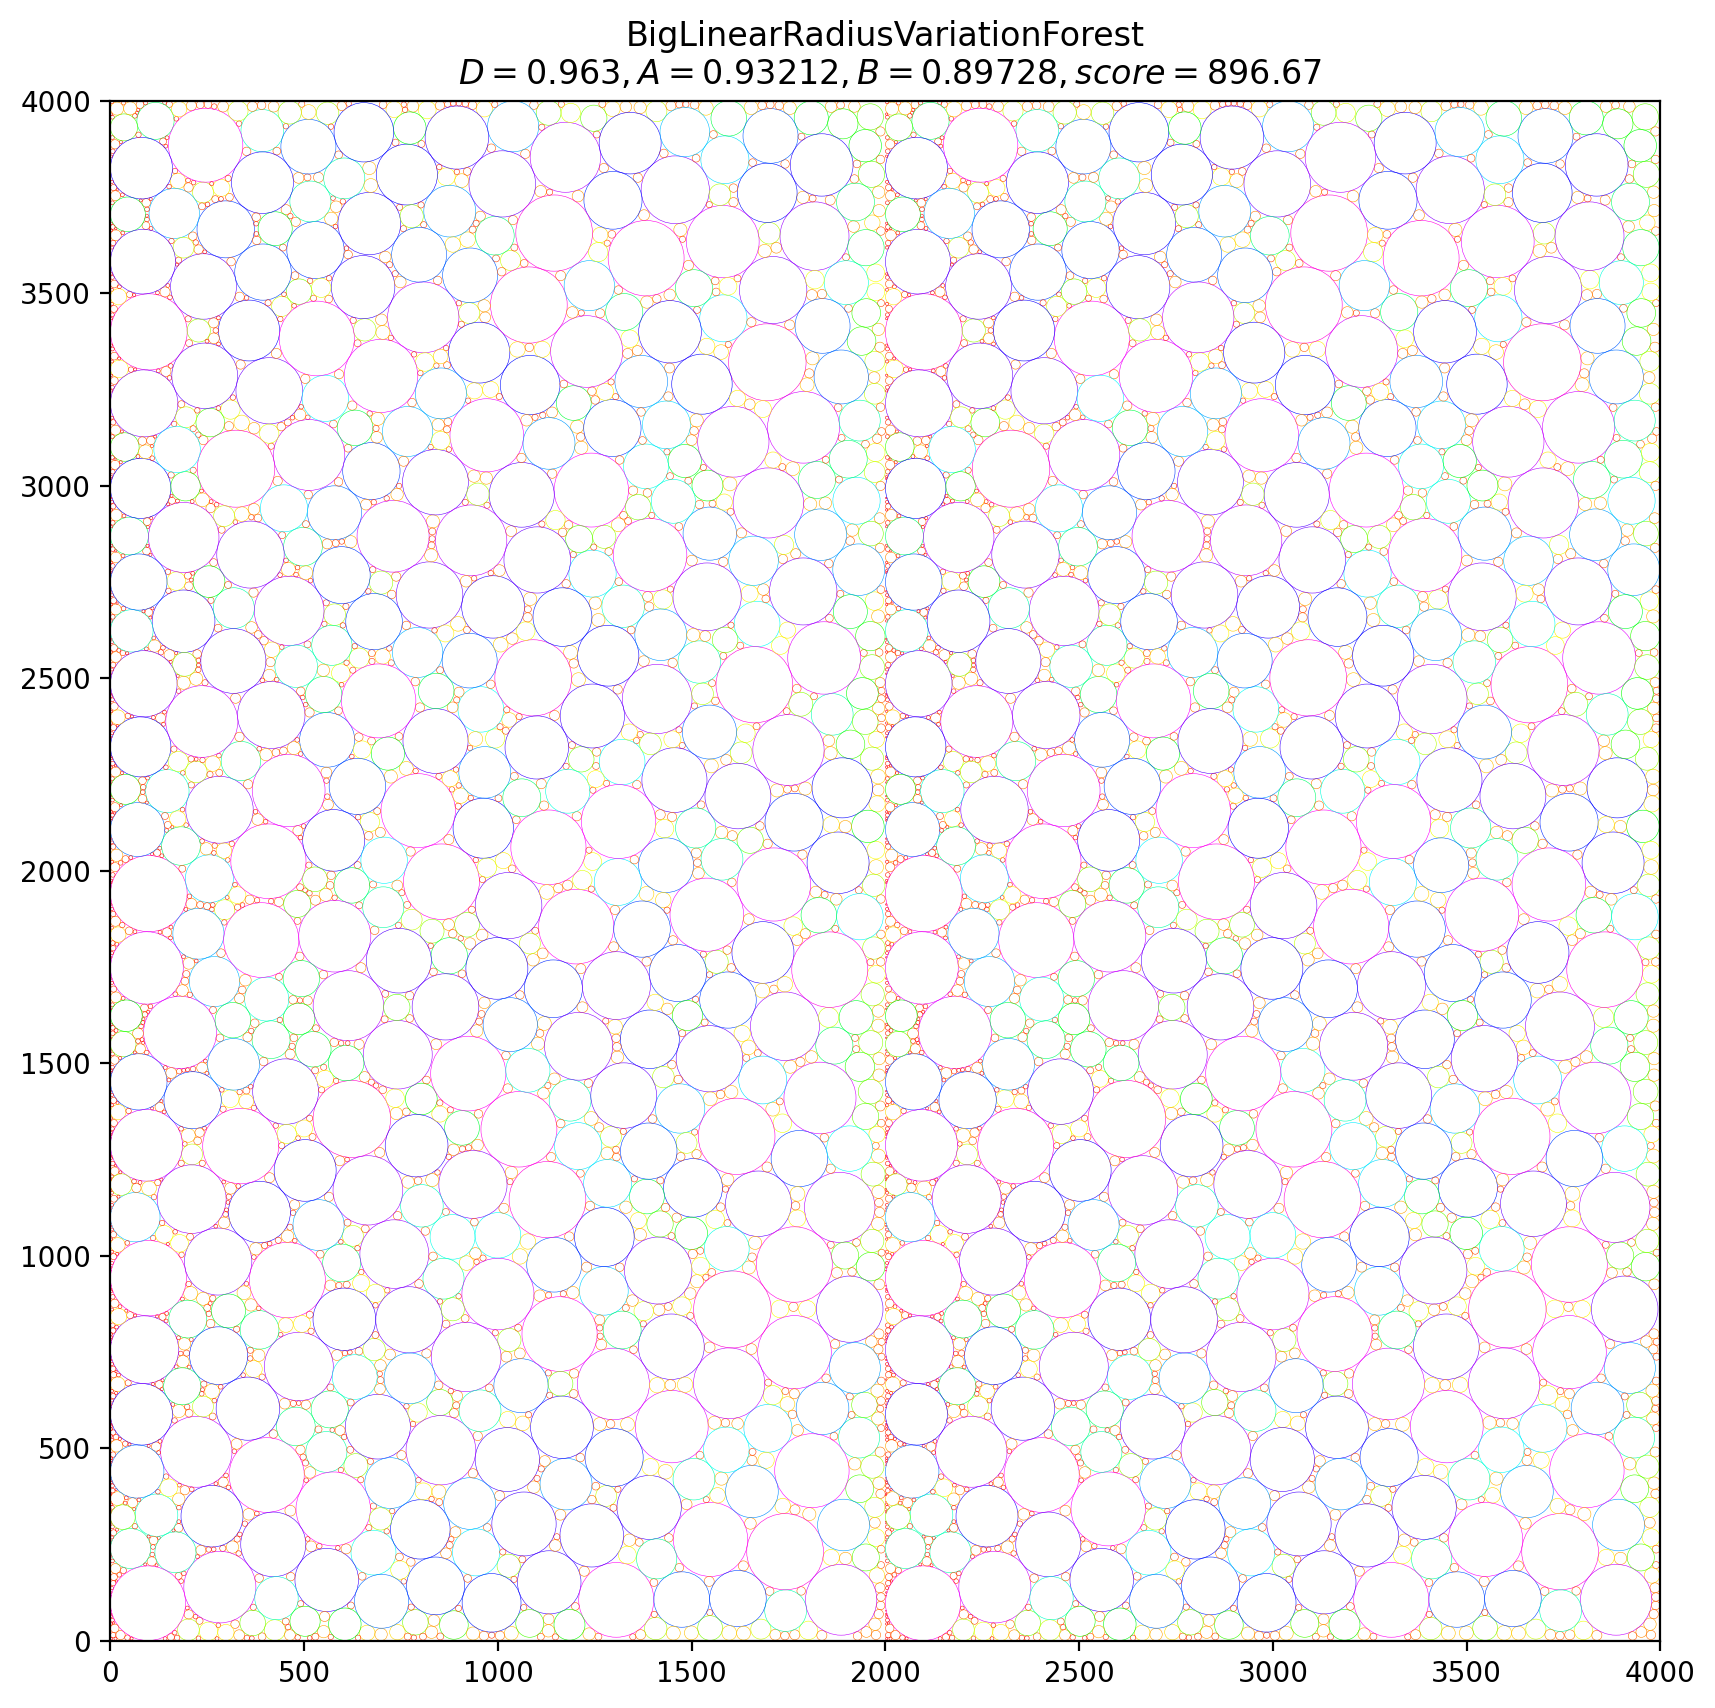

In [8]:
forest = "forest10"
w = Wald(f"input_files/{forest}.txt")
w.x_size /= 1
w.y_size /= 1
result = read_result(f"result_files/{forest}.txt.out")
w.plot(result, legend=False)

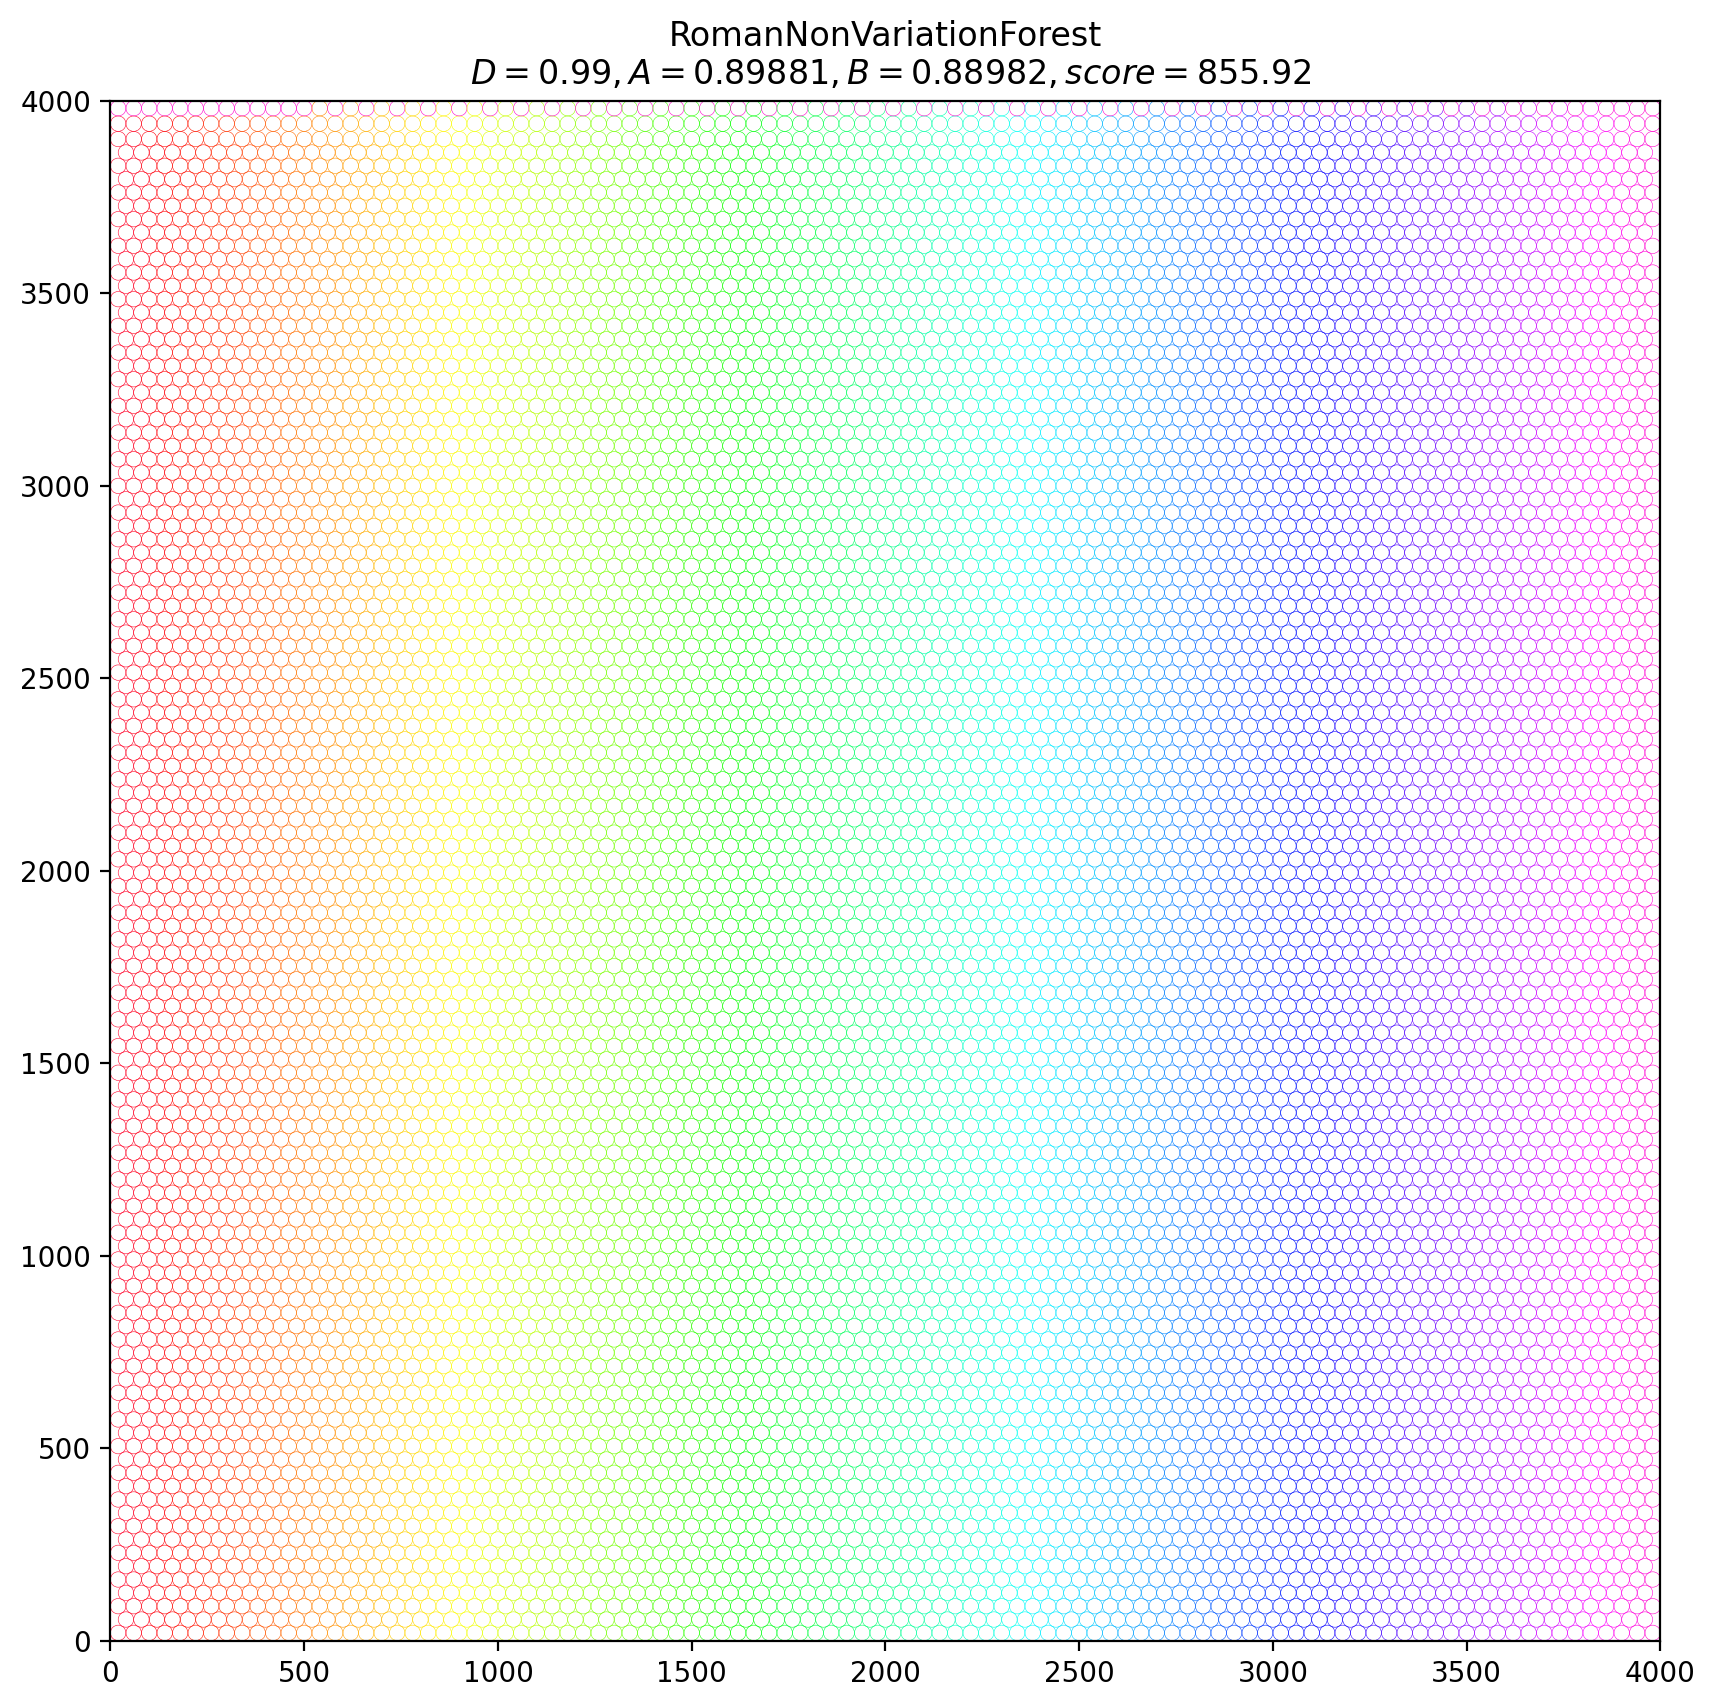

In [5]:
# Lösung für forest11
w = Wald("input_files/forest11.txt")
trees = pd.DataFrame(columns=["x","y","size","label"])
r = 20
dh = np.sqrt((2*r)**2 - r**2)#34.641016151377

maxj = int(w.x_size/(2*dh)-1)
for j in range(0, maxj):
    maxi = int(w.x_size/(4*r))
    for i in range(0, maxi-1):
        trees.loc[len(trees)] = [(1+4*i)*r, r + j * (2*dh), r, 0 + 2*i]
        trees.loc[len(trees)] = [(3+4*i)*r, r + j * (2*dh), r, 1 + 2*i]
        trees.loc[len(trees)] = [(2+4*i)*r, r + dh + j * (2*dh), r, 0 + 2*i]
        trees.loc[len(trees)] = [(4+4*i)*r, r + dh + j * (2*dh), r, 1 + 2*i]
    trees.loc[len(trees)] = [(1+4*(maxi-1))*r, r + j * (2*dh), r, 0 + 2*(maxi-1)]
    trees.loc[len(trees)] = [(3+4*(maxi-1))*r, r + j * (2*dh), r, 1 + 2*(maxi-1)]
    trees.loc[len(trees)] = [(2+4*(maxi-1))*r, r + dh + j * (2*dh), r, 0 + 2*(maxi-1)]
for i in range(0, maxi):
    trees.loc[len(trees)] = [(1+4*i)*r, 4000-5*r, r, 0 + 2*i]
    trees.loc[len(trees)] = [(3+4*i)*r, 4000-5*r, r, 1 + 2*i]

    trees.loc[len(trees)] = [(1+4*i)*r, 4000-3*r, r, 0 + 2*i]
    trees.loc[len(trees)] = [(3+4*i)*r, 4000-3*r, r, 1 + 2*i]

    trees.loc[len(trees)] = [(1+4*i)*r, 4000 - r, r, 0 + 99]
    if i < 6:
        trees.loc[len(trees)] = [(3+4*i)*r, 4000 - r, r, 99]
    else:
        trees.loc[len(trees)] = [(3+4*i)*r, 4000 - r, r, 1 + 2*i]
trees["label"] = trees["label"].apply(int)
trees.to_csv("result_files/forest11.txt.out", sep=" ", header=False, index=False)
w.plot(trees, legend=False)

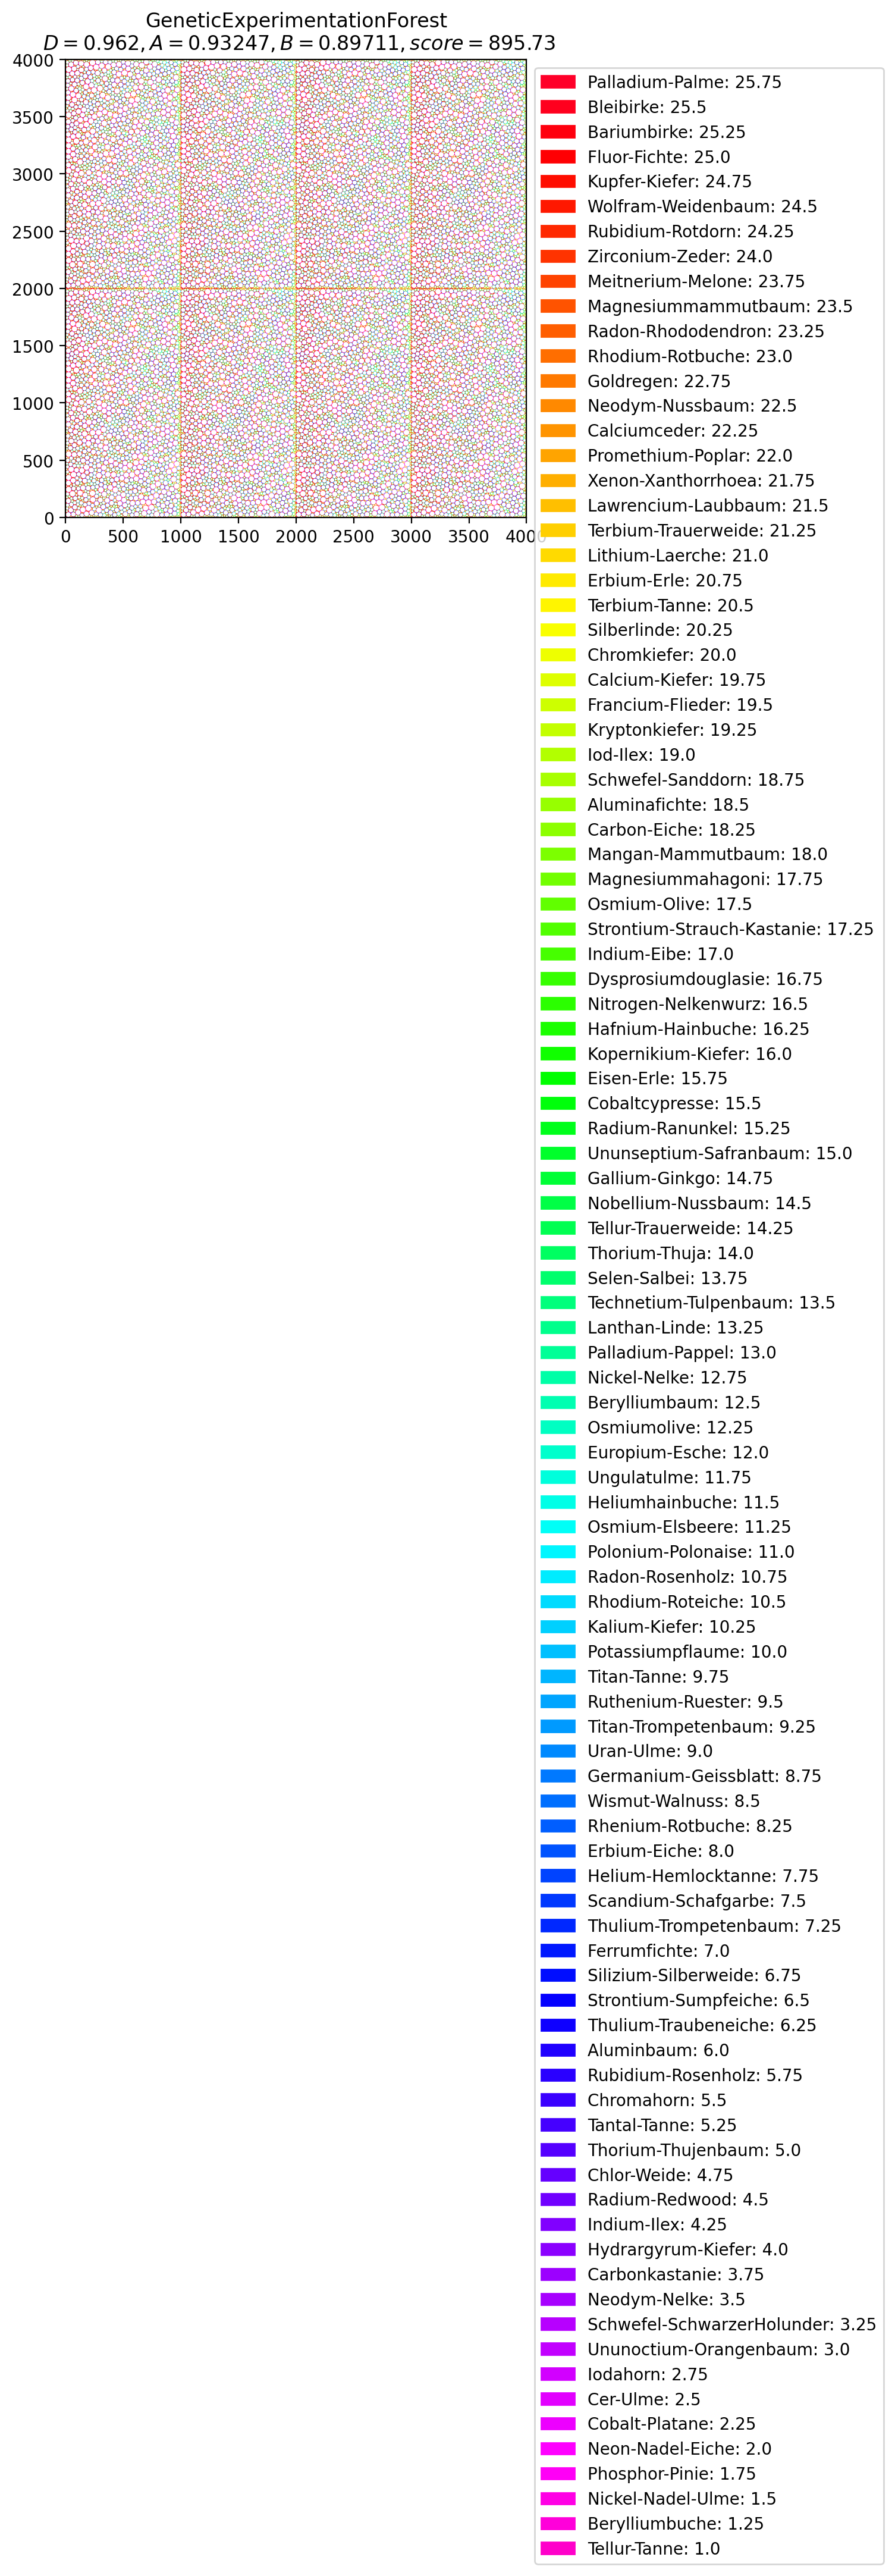

In [24]:
# Lösung skalieren
forest = "forest14"
x_scale = 4 # int!!
y_scale = 2 # int!!

best_result = read_result(f"result_files/{forest}.txt.out")

w = Wald(f"input_files/{forest}.txt")
cell = best_result.copy()
# scale result
width = w.x_size/x_scale
for i in range(1, x_scale):
    copy = cell.copy()
    copy["x"] = copy["x"] + i * width
    best_result = pd.concat([best_result, copy])
row = best_result.copy()
height = w.y_size/y_scale
for i in range(1, y_scale):
    copy = row.copy()
    copy["y"] = copy["y"] + i * height
    best_result = pd.concat([best_result, copy])

# Save result
best_result.to_csv(f"result_files/{forest}_scaled.txt.out", sep=" ", header=False, index=False)
shuffled = best_result.sample(frac=1)
shuffled.to_csv(f"result_files/{forest}_scaled_shuffled.txt.out", sep=" ", header=False, index=False)
w.plot(best_result, legend=True, size=5)